# Leves | Tratamento base RendaBV

Autor: Felipe Oliveira

------------

## Objetivo
Tratamento da base RendaBV com o intuito de utilizar suas variáveis na modelagem de leves

#Pacotes

## 1. Importação de funções

In [0]:
%run "/Users/lucas.lima@bv.com.br/funcoes/funcoes_lucas"

## 2. Instalando libs adicionais

In [0]:
#INSTALAÇÃO
!pip install quinn

## 3. Importando libs

In [0]:
#Mínimo necessário para o deploy
import pytz
import json
import sys
import dateutil.relativedelta as dt
from datetime import datetime, timedelta, date
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import Window
import pyspark.sql.functions as F
import datetime
import dateutil.relativedelta as dt

#extras
from pyspark.ml.feature import QuantileDiscretizer
from pyspark.ml.feature import Bucketizer
import quinn
import pandas as pd
import numpy as np

calc_perf(n_base,v_score,v_target) | última atualização: 03/03/2022

#Visualização

In [0]:
%sql SELECT * FROM dvry_credito.TbRendaBV LIMIT 3

CPF,RendaBV,TsInclusao,DtReferencia
827088,1000.0,2021-08-16T17:07:40.000+0000,20210816170740
7258461,1150.0,2021-08-16T17:07:40.000+0000,20210816170740
20953356,1450.0,2021-08-16T17:07:40.000+0000,20210816170740


cria_fxs(nbase1,nbase2,nvar,n_fxs,nova_var) | última atualização 08/03/2022

##1. Recuperação base

In [0]:
#base scoreBacen
base_rendaBV = spark.sql('''
  select * from dvry_credito.TbRendaBV
''')

base_rendaBV.printSchema()

root
-- CPF: string (nullable = true)
-- RendaBV: decimal(18,2) (nullable = true)
-- TsInclusao: timestamp (nullable = true)
-- DtReferencia: long (nullable = true)

In [0]:
base_rendaBV.display()

CPF,RendaBV,TsInclusao,DtReferencia
827088,1000.0,2021-08-16T17:07:40.000+0000,20210816170740
7258461,1150.0,2021-08-16T17:07:40.000+0000,20210816170740
20953356,1450.0,2021-08-16T17:07:40.000+0000,20210816170740
22913394,750.0,2021-08-16T17:07:40.000+0000,20210816170740
24243639,1900.0,2021-08-16T17:07:40.000+0000,20210816170740
25922319,750.0,2021-08-16T17:07:40.000+0000,20210816170740
28079558,8350.0,2021-08-16T17:07:40.000+0000,20210816170740
32747802,1250.0,2021-08-16T17:07:40.000+0000,20210816170740
38383071,750.0,2021-08-16T17:07:40.000+0000,20210816170740
38625695,550.0,2021-08-16T17:07:40.000+0000,20210816170740


#Tratamento base

##1. Conversões

In [0]:
# Convertendo CPF : string -> long
base_rendaBV = base_rendaBV.withColumn("CPF", base_rendaBV.CPF.cast(LongType()))
base_rendaBV.display()

CPF,RendaBV,TsInclusao,DtReferencia
827088,1000.0,2021-08-16T17:07:40.000+0000,20210816170740
7258461,1150.0,2021-08-16T17:07:40.000+0000,20210816170740
20953356,1450.0,2021-08-16T17:07:40.000+0000,20210816170740
22913394,750.0,2021-08-16T17:07:40.000+0000,20210816170740
24243639,1900.0,2021-08-16T17:07:40.000+0000,20210816170740
25922319,750.0,2021-08-16T17:07:40.000+0000,20210816170740
28079558,8350.0,2021-08-16T17:07:40.000+0000,20210816170740
32747802,1250.0,2021-08-16T17:07:40.000+0000,20210816170740
38383071,750.0,2021-08-16T17:07:40.000+0000,20210816170740
38625695,550.0,2021-08-16T17:07:40.000+0000,20210816170740


In [0]:
# Convertendo DtReferencia : Integer -> Date
base_rendaBV = base_rendaBV.withColumn("DtReferencia", to_date(base_rendaBV.DtReferencia.cast(StringType()), 'yyyyMMddHHmmss'))
base_rendaBV.display()

CPF,RendaBV,TsInclusao,DtReferencia
827088,1000.0,2021-08-16T17:07:40.000+0000,2021-08-16
7258461,1150.0,2021-08-16T17:07:40.000+0000,2021-08-16
20953356,1450.0,2021-08-16T17:07:40.000+0000,2021-08-16
22913394,750.0,2021-08-16T17:07:40.000+0000,2021-08-16
24243639,1900.0,2021-08-16T17:07:40.000+0000,2021-08-16
25922319,750.0,2021-08-16T17:07:40.000+0000,2021-08-16
28079558,8350.0,2021-08-16T17:07:40.000+0000,2021-08-16
32747802,1250.0,2021-08-16T17:07:40.000+0000,2021-08-16
38383071,750.0,2021-08-16T17:07:40.000+0000,2021-08-16
38625695,550.0,2021-08-16T17:07:40.000+0000,2021-08-16


In [0]:
#Removendo o dia da DtReferencia
base_rendaBV = base_rendaBV.withColumn("DtReferencia", date_format(base_rendaBV.DtReferencia.cast(StringType()), 'yyyyMM'))
base_rendaBV = base_rendaBV.withColumn("DtReferencia", to_date(base_rendaBV.DtReferencia.cast(StringType()), 'yyyyMM'))

base_rendaBV.display()

CPF,RendaBV,TsInclusao,DtReferencia
827088,1000.0,2021-08-16T17:07:40.000+0000,2021-08-01
7258461,1150.0,2021-08-16T17:07:40.000+0000,2021-08-01
20953356,1450.0,2021-08-16T17:07:40.000+0000,2021-08-01
22913394,750.0,2021-08-16T17:07:40.000+0000,2021-08-01
24243639,1900.0,2021-08-16T17:07:40.000+0000,2021-08-01
25922319,750.0,2021-08-16T17:07:40.000+0000,2021-08-01
28079558,8350.0,2021-08-16T17:07:40.000+0000,2021-08-01
32747802,1250.0,2021-08-16T17:07:40.000+0000,2021-08-01
38383071,750.0,2021-08-16T17:07:40.000+0000,2021-08-01
38625695,550.0,2021-08-16T17:07:40.000+0000,2021-08-01


## 2. Filtragem

In [0]:
# Filtrando a base por safras
safras = [8, 11, 12]

base_rendaBV = base_rendaBV.filter(month(base_rendaBV.DtReferencia).isin(safras))
base_rendaBV.display()

CPF,RendaBV,TsInclusao,DtReferencia
827088,1000.0,2021-08-16T17:07:40.000+0000,2021-08-01
7258461,1150.0,2021-08-16T17:07:40.000+0000,2021-08-01
20953356,1450.0,2021-08-16T17:07:40.000+0000,2021-08-01
22913394,750.0,2021-08-16T17:07:40.000+0000,2021-08-01
24243639,1900.0,2021-08-16T17:07:40.000+0000,2021-08-01
25922319,750.0,2021-08-16T17:07:40.000+0000,2021-08-01
28079558,8350.0,2021-08-16T17:07:40.000+0000,2021-08-01
32747802,1250.0,2021-08-16T17:07:40.000+0000,2021-08-01
38383071,750.0,2021-08-16T17:07:40.000+0000,2021-08-01
38625695,550.0,2021-08-16T17:07:40.000+0000,2021-08-01


In [0]:
print(base_rendaBV.select(month(col("DtReferencia"))).distinct().count())

3

In [0]:
base_rendaBV = base_rendaBV.drop("TsInclusao")
base_rendaBV.printSchema()

root
-- CPF: long (nullable = true)
-- RendaBV: decimal(18,2) (nullable = true)
-- DtReferencia: date (nullable = true)

##3. Renomeando colunas

In [0]:
def renomeia_cols(s):
    return cols_mapeadas[s]
def retorna_nome_col(s):
    return s in cols_mapeadas

cols_mapeadas = {
  "CPF" : "NuCpfCnpj",
  "DtReferencia" : "DtEntradaProposta"
}

base_rendaBV = quinn.with_some_columns_renamed(renomeia_cols, retorna_nome_col)(base_rendaBV)
base_rendaBV.display()

NuCpfCnpj,RendaBV,DtEntradaProposta
827088,1000.0,2021-08-01
7258461,1150.0,2021-08-01
20953356,1450.0,2021-08-01
22913394,750.0,2021-08-01
24243639,1900.0,2021-08-01
25922319,750.0,2021-08-01
28079558,8350.0,2021-08-01
32747802,1250.0,2021-08-01
38383071,750.0,2021-08-01
38625695,550.0,2021-08-01


## 3. Tratamentos adicionais

In [0]:
base_rendaBV.describe(['RendaBV']).display()

summary,RendaBV
count,1051324380
mean,2412.741887
stddev,3746.54661114438
min,100.00
max,215500.00


#Join base principal

##Visualizando tabela

In [0]:
%sql
SELECT * FROM cred_lucaslima.base_levesbandaid LIMIT 3

NuProposta,NuCpfCnpj,DtEntradaProposta,DtPrimeiroCadastro,elegiveis,inad30,QtMesesEmprego,DsEstadoCivil,CdUfCliente,QtdCcf_Total,QtAtrasoMed_Cpf,QtAtrasoMax_Cpf,QtAtrasoAtual_Cpf,QtCtoQuitado_Total,cd_mosaic
181247441,11126,17/09/2021,01/11/2019,1,0,60,CASADO,MS,null,1.6666666667,16,1,0,L36
421150798,187089,24/01/2022,08/01/2020,0,0,72,SOLTEIRO,RS,null,0.5172413793,5,null,0,E12
450933222,556033,15/10/2021,08/08/2017,1,0,102,CASADO,RS,null,6.375,20,null,0,B04


In [0]:
base_leves=spark.sql('''
  select * from cred_lucaslima.base_levesbandaid
''')

base_leves.columns

Out[58]: ['NuProposta',
 'NuCpfCnpj',
 'DtEntradaProposta',
 'DtPrimeiroCadastro',
 'elegiveis',
 'inad30',
 'QtMesesEmprego',
 'DsEstadoCivil',
 'CdUfCliente',
 'QtdCcf_Total',
 'QtAtrasoMed_Cpf',
 'QtAtrasoMax_Cpf',
 'QtAtrasoAtual_Cpf',
 'QtCtoQuitado_Total',
 'cd_mosaic']

In [0]:
base_leves.display()

NuProposta,NuCpfCnpj,DtEntradaProposta,DtPrimeiroCadastro,elegiveis,inad30,QtMesesEmprego,DsEstadoCivil,CdUfCliente,QtdCcf_Total,QtAtrasoMed_Cpf,QtAtrasoMax_Cpf,QtAtrasoAtual_Cpf,QtCtoQuitado_Total,cd_mosaic
181247441,11126,17/09/2021,01/11/2019,1,0,60,CASADO,MS,null,1.6666666667,16,1,0,L36
421150798,187089,24/01/2022,08/01/2020,0,0,72,SOLTEIRO,RS,null,0.5172413793,5,null,0,E12
450933222,556033,15/10/2021,08/08/2017,1,0,102,CASADO,RS,null,6.375,20,null,0,B04
661877443,1011502,03/08/2021,null,1,0,180,CASADO,BA,null,null,null,null,null,B04
312873028,1080148,25/10/2021,05/08/2008,1,0,126,CASADO,GO,null,8.2835820896,35,null,4,F17
531975096,1255126,19/08/2021,06/12/2006,1,0,78,CASADO,GO,null,4.6,54,null,1,F19
303005981,1413139,20/12/2021,15/02/2008,0,0,130,CASADO,DF,null,2.5833333333,36,null,3,C07
421145778,1416073,25/11/2021,19/02/2019,1,0,98,SOLTEIRO,RS,null,0.4444444444,3,null,1,C07
531997397,1532146,17/12/2021,null,1,0,66,CASADO,GO,null,null,null,null,null,A03
591007432,1648101,15/09/2021,null,1,0,120,SOLTEIRO,TO,null,null,null,null,null,K34


In [0]:
base_leves.printSchema()

root
-- NuProposta: integer (nullable = true)
-- NuCpfCnpj: long (nullable = true)
-- DtEntradaProposta: string (nullable = true)
-- DtPrimeiroCadastro: string (nullable = true)
-- elegiveis: integer (nullable = true)
-- inad30: integer (nullable = true)
-- QtMesesEmprego: integer (nullable = true)
-- DsEstadoCivil: string (nullable = true)
-- CdUfCliente: string (nullable = true)
-- QtdCcf_Total: integer (nullable = true)
-- QtAtrasoMed_Cpf: double (nullable = true)
-- QtAtrasoMax_Cpf: integer (nullable = true)
-- QtAtrasoAtual_Cpf: integer (nullable = true)
-- QtCtoQuitado_Total: integer (nullable = true)
-- cd_mosaic: string (nullable = true)

In [0]:
#Convertendo DtEntradaProposta : string -> date
base_leves = base_leves.withColumn("DtEntradaProposta", to_date(base_leves.DtEntradaProposta.cast(StringType()), 'dd/MM/yyyy'))
base_leves.display()

NuProposta,NuCpfCnpj,DtEntradaProposta,DtPrimeiroCadastro,elegiveis,inad30,QtMesesEmprego,DsEstadoCivil,CdUfCliente,QtdCcf_Total,QtAtrasoMed_Cpf,QtAtrasoMax_Cpf,QtAtrasoAtual_Cpf,QtCtoQuitado_Total,cd_mosaic
181247441,11126,2021-09-17,01/11/2019,1,0,60,CASADO,MS,null,1.6666666667,16,1,0,L36
421150798,187089,2022-01-24,08/01/2020,0,0,72,SOLTEIRO,RS,null,0.5172413793,5,null,0,E12
450933222,556033,2021-10-15,08/08/2017,1,0,102,CASADO,RS,null,6.375,20,null,0,B04
661877443,1011502,2021-08-03,null,1,0,180,CASADO,BA,null,null,null,null,null,B04
312873028,1080148,2021-10-25,05/08/2008,1,0,126,CASADO,GO,null,8.2835820896,35,null,4,F17
531975096,1255126,2021-08-19,06/12/2006,1,0,78,CASADO,GO,null,4.6,54,null,1,F19
303005981,1413139,2021-12-20,15/02/2008,0,0,130,CASADO,DF,null,2.5833333333,36,null,3,C07
421145778,1416073,2021-11-25,19/02/2019,1,0,98,SOLTEIRO,RS,null,0.4444444444,3,null,1,C07
531997397,1532146,2021-12-17,null,1,0,66,CASADO,GO,null,null,null,null,null,A03
591007432,1648101,2021-09-15,null,1,0,120,SOLTEIRO,TO,null,null,null,null,null,K34


In [0]:
# Verificando se é preciso remover o dia da DtEntradaProposta
#print(base_leves.filter(dayofmonth(col("DtEntradaProposta")) == '16').count())

In [0]:
#Removendo o dia da DtEntradaProposta
base_leves = base_leves.withColumn("DtEntradaProposta", date_format(base_leves.DtEntradaProposta.cast(StringType()), 'yyyyMM'))
base_leves = base_leves.withColumn("DtEntradaProposta", to_date(base_leves.DtEntradaProposta.cast(StringType()), 'yyyyMM'))

base_leves.display()

NuProposta,NuCpfCnpj,DtEntradaProposta,DtPrimeiroCadastro,elegiveis,inad30,QtMesesEmprego,DsEstadoCivil,CdUfCliente,QtdCcf_Total,QtAtrasoMed_Cpf,QtAtrasoMax_Cpf,QtAtrasoAtual_Cpf,QtCtoQuitado_Total,cd_mosaic
181247441,11126,2021-09-01,01/11/2019,1,0,60,CASADO,MS,null,1.6666666667,16,1,0,L36
421150798,187089,2022-01-01,08/01/2020,0,0,72,SOLTEIRO,RS,null,0.5172413793,5,null,0,E12
450933222,556033,2021-10-01,08/08/2017,1,0,102,CASADO,RS,null,6.375,20,null,0,B04
661877443,1011502,2021-08-01,null,1,0,180,CASADO,BA,null,null,null,null,null,B04
312873028,1080148,2021-10-01,05/08/2008,1,0,126,CASADO,GO,null,8.2835820896,35,null,4,F17
531975096,1255126,2021-08-01,06/12/2006,1,0,78,CASADO,GO,null,4.6,54,null,1,F19
303005981,1413139,2021-12-01,15/02/2008,0,0,130,CASADO,DF,null,2.5833333333,36,null,3,C07
421145778,1416073,2021-11-01,19/02/2019,1,0,98,SOLTEIRO,RS,null,0.4444444444,3,null,1,C07
531997397,1532146,2021-12-01,null,1,0,66,CASADO,GO,null,null,null,null,null,A03
591007432,1648101,2021-09-01,null,1,0,120,SOLTEIRO,TO,null,null,null,null,null,K34


In [0]:
print("Qtde de linhas base leves: ", base_leves.count())

Qtde de linhas base leves: 295517

##Join das tabelas

In [0]:
base_final = base_leves.join(base_rendaBV,["NuCpfCnpj","DtEntradaProposta"], how="left")

In [0]:
print("Qtde de linhas base final: ", base_final.count())

Qtde de linhas base final: 489890

In [0]:
base_final.display()

NuCpfCnpj,DtEntradaProposta,NuProposta,DtPrimeiroCadastro,elegiveis,inad30,QtMesesEmprego,DsEstadoCivil,CdUfCliente,QtdCcf_Total,QtAtrasoMed_Cpf,QtAtrasoMax_Cpf,QtAtrasoAtual_Cpf,QtCtoQuitado_Total,cd_mosaic,RendaBV
45733074,2021-09-01,450927304,07/01/2021,1,0,240,SOLTEIRO,RS,null,0.5454545455,6,null,0,L36,null
126665214,2021-08-01,781711013,null,1,0,120,SOLTEIRO,RR,null,null,null,null,null,B05,2200.0
126665214,2021-08-01,781711013,null,1,0,120,SOLTEIRO,RR,null,null,null,null,null,B05,2200.0
126665214,2021-08-01,781711013,null,1,0,120,SOLTEIRO,RR,null,null,null,null,null,B05,2200.0
126665214,2021-08-01,781711013,null,1,0,120,SOLTEIRO,RR,null,null,null,null,null,B05,2200.0
131382608,2021-08-01,352150628,null,1,0,240,SEPARADO,MG,null,null,null,null,null,E14,1750.0
131382608,2021-08-01,352150628,null,1,0,240,SEPARADO,MG,null,null,null,null,null,E14,1750.0
131382608,2021-08-01,352150628,null,1,0,240,SEPARADO,MG,null,null,null,null,null,E14,1750.0
131382608,2021-08-01,352150628,null,1,0,240,SEPARADO,MG,null,null,null,null,null,E14,1750.0
212672193,2021-10-01,781721016,null,1,0,103,SOLTEIRO,AC,null,null,null,null,null,B04,null


In [0]:
base_final_dup = base_final.dropDuplicates()
base_final_dup.count()

Out[68]: 295527

# Procedimentos

## Base original RendaBV

### 1. Distribuições

In [0]:
#Convertendo tipagens antes da conversão pyspark -> base pandas
base_rendaBV_cast = base_rendaBV.withColumn("RendaBV", base_rendaBV.RendaBV.cast(FloatType()))
base_rendaBV_cast.printSchema()

root
-- NuCpfCnpj: long (nullable = true)
-- RendaBV: float (nullable = true)
-- DtEntradaProposta: date (nullable = true)

In [0]:
pd_base_original = base_rendaBV_cast.toPandas()

In [0]:
pd_base =  pd_base.fillna({'RendaBV':0})
pd_base
pd_base["RendaBV"].unique()

Out[71]: array([ 0., 2200., 1750., ..., 3843., 4687., 37050.], dtype=float32)

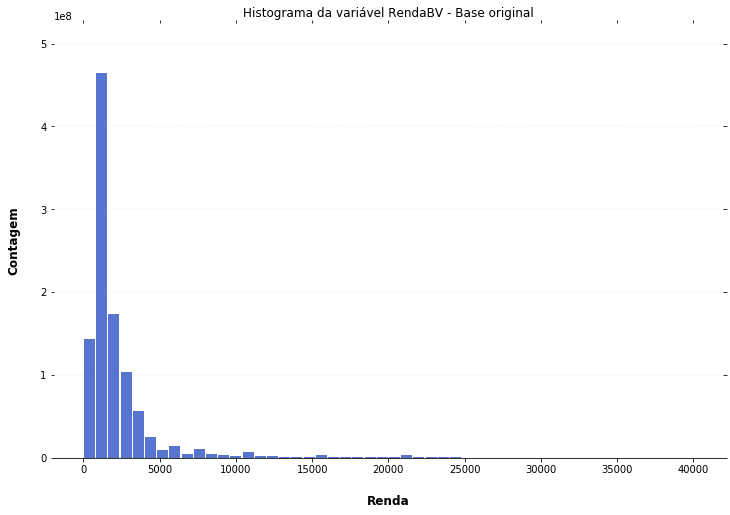

In [0]:
ax = pd_base_original.hist(column='RendaBV', bins=50, grid=False, figsize=(12,8), color='#5775CF', zorder=2, rwidth=0.9, range=[0, 40000])

ax = ax[0]
for x in ax:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    x.set_title("Histograma da variável RendaBV - Base original")
    x.set_xlabel("Renda", labelpad=20, weight='semibold', size=12)
    x.set_ylabel("Contagem", labelpad=20, weight='semibold', size=12)

## Clientes

In [0]:
#Convertendo base pyspark -> base pandas
pd_base = base_final_cast.toPandas()
pd_base

,NuCpfCnpj,DtEntradaProposta,NuProposta,DtPrimeiroCadastro,elegiveis,inad30,QtMesesEmprego,DsEstadoCivil,CdUfCliente,QtdCcf_Total,QtAtrasoMed_Cpf,QtAtrasoMax_Cpf,QtAtrasoAtual_Cpf,QtCtoQuitado_Total,cd_mosaic,RendaBV
0,45733074,2021-09-01,450927304,07/01/2021,1,0,240,SOLTEIRO,RS,NaN,0.545455,6.0,NaN,0.0,L36,NaN
1,126665214,2021-08-01,781711013,None,1,0,120,SOLTEIRO,RR,NaN,NaN,NaN,NaN,NaN,B05,2200.0
2,131382608,2021-08-01,352150628,None,1,0,240,SEPARADO,MG,NaN,NaN,NaN,NaN,NaN,E14,1750.0
3,212672193,2021-10-01,781721016,None,1,0,103,SOLTEIRO,AC,NaN,NaN,NaN,NaN,NaN,B04,NaN
4,235595004,2021-12-01,271609624,20/07/2018,0,0,180,SOLTEIRO,RS,NaN,0.039604,1.0,NaN,2.0,C07,11900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295522,99415208015,2021-11-01,371818174,02/06/2011,1,0,180,SOLTEIRO,RS,NaN,7.958333,25.0,NaN,1.0,D10,1100.0
295523,99630109034,2021-11-01,371816000,31/03/2021,1,0,180,SOLTEIRO,RS,NaN,0.000000,0.0,NaN,0.0,None,2250.0
295524,99688077372,2021-09-01,362434760,11/11/2020,1,0,66,SOLTEIRO,CE,NaN,0.000000,0.0,NaN,1.0,K34,NaN
295525,99765179987,2021-12-01,901139346,12/04/2002,1,0,180,CASADO,SC,NaN,2.476190,25.0,NaN,3.0,F15,2450.0


###1. Cálculo KS

In [0]:
pd_base_clientes = pd_base[pd_base.DtPrimeiroCadastro.notnull()]
pd_base_clientes

,NuCpfCnpj,DtEntradaProposta,NuProposta,DtPrimeiroCadastro,elegiveis,inad30,QtMesesEmprego,DsEstadoCivil,CdUfCliente,QtdCcf_Total,QtAtrasoMed_Cpf,QtAtrasoMax_Cpf,QtAtrasoAtual_Cpf,QtCtoQuitado_Total,cd_mosaic,RendaBV
0,45733074,2021-09-01,450927304,07/01/2021,1,0,240,SOLTEIRO,RS,NaN,0.545455,6.0,NaN,0.0,L36,0.0
4,235595004,2021-12-01,271609624,20/07/2018,0,0,180,SOLTEIRO,RS,NaN,0.039604,1.0,NaN,2.0,C07,11900.0
5,263861007,2021-11-01,325002288,21/07/2003,1,0,78,SOLTEIRO,RS,NaN,0.626263,8.0,NaN,2.0,F15,4000.0
9,322798760,2022-01-01,285012348,30/03/2017,0,0,120,SOLTEIRO,RJ,NaN,1.338462,12.0,NaN,1.0,F18,0.0
10,326331140,2021-11-01,401659786,21/12/2017,1,0,99,CASADO,MS,NaN,39.333333,171.0,NaN,1.0,L36,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295522,99415208015,2021-11-01,371818174,02/06/2011,1,0,180,SOLTEIRO,RS,NaN,7.958333,25.0,NaN,1.0,D10,1100.0
295523,99630109034,2021-11-01,371816000,31/03/2021,1,0,180,SOLTEIRO,RS,NaN,0.000000,0.0,NaN,0.0,None,2250.0
295524,99688077372,2021-09-01,362434760,11/11/2020,1,0,66,SOLTEIRO,CE,NaN,0.000000,0.0,NaN,1.0,K34,0.0
295525,99765179987,2021-12-01,901139346,12/04/2002,1,0,180,CASADO,SC,NaN,2.476190,25.0,NaN,3.0,F15,2450.0


In [0]:
print("KS da variável RendaBV - Clientes: ", calc_perf(pd_base_clientes, "RendaBV", "inad30")[0])

KS da variável RendaBV - Clientes: 4.4644057724656125

### 2. Cálculo IV

In [0]:
#Divindo a base em faixas
pd_base_fxs_clientes = cria_fxs(pd_base_clientes,pd_base_clientes,"RendaBV",5,"fx_rendaBV")
pd_base_fxs_clientes["fx_rendaBV"].unique()

/local_disk0/tmp/1646991187425-0/PythonShell.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 from six import StringIO # cString does not support unicode well
Out[91]: array([0, 2, 1])

In [0]:
# Visualizando faixas
pd.crosstab(pd_base_fxs_clientes.fx_rendaBV,columns='fx_renda')

col_0,fx_renda
fx_rendaBV,
0,87169
1,28688
2,28598


In [0]:
# Cálculo IV
nvar_fx, iv , tx = calc_IV(pd_base_fxs_clientes,'fx_rendaBV','inad30')

variaveis = ["RendaBV_Clientes"]
ivs = [iv]

print(tx)

inad30 0 1 WoE iv_linha
fx_rendaBV 
0 85608 1561 -0.028275 0.000489
1 28177 511 -0.022835 0.000105
2 28154 444 0.116893 0.002558

In [0]:
pd_base_ivs = pd.DataFrame(
    {
        "Variável": variaveis,
        "IV": [iv * 100 for iv in ivs],
    }
)


base_spark = spark.createDataFrame(pd_base_ivs)
base_spark.display()

Variável,IV
RendaBV_Clientes,0.3151657849149898


### 3. Distribuições

In [0]:
#Convertendo tipagens antes da conversão pyspark -> base pandas
base_final_cast = base_final_dup.withColumn("RendaBV", base_final_dup.RendaBV.cast(FloatType()))
base_final_cast.display()

NuCpfCnpj,DtEntradaProposta,NuProposta,DtPrimeiroCadastro,elegiveis,inad30,QtMesesEmprego,DsEstadoCivil,CdUfCliente,QtdCcf_Total,QtAtrasoMed_Cpf,QtAtrasoMax_Cpf,QtAtrasoAtual_Cpf,QtCtoQuitado_Total,cd_mosaic,RendaBV
45733074,2021-09-01,450927304,07/01/2021,1,0,240,SOLTEIRO,RS,null,0.5454545455,6,null,0,L36,null
126665214,2021-08-01,781711013,null,1,0,120,SOLTEIRO,RR,null,null,null,null,null,B05,2200.0
131382608,2021-08-01,352150628,null,1,0,240,SEPARADO,MG,null,null,null,null,null,E14,1750.0
212672193,2021-10-01,781721016,null,1,0,103,SOLTEIRO,AC,null,null,null,null,null,B04,null
235595004,2021-12-01,271609624,20/07/2018,0,0,180,SOLTEIRO,RS,null,0.0396039604,1,null,2,C07,11900.0
263861007,2021-11-01,325002288,21/07/2003,1,0,78,SOLTEIRO,RS,null,0.6262626263,8,null,2,F15,4000.0
268035776,2021-10-01,711291837,null,1,0,101,SOLTEIRO,RJ,null,null,null,null,null,F15,null
297961136,2021-09-01,391806608,null,1,0,120,CASADO,MT,null,null,null,null,null,F17,null
303318031,2021-12-01,450939815,null,1,0,69,SOLTEIRO,RS,null,null,null,null,null,C07,2900.0
322798760,2022-01-01,285012348,30/03/2017,0,0,120,SOLTEIRO,RJ,null,1.3384615385,12,null,1,F18,null


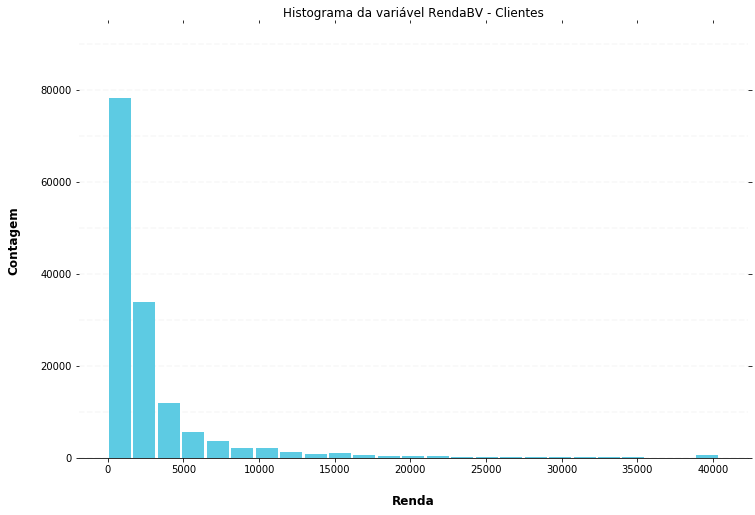

In [0]:
ax = pd_base_fxs_clientes.hist(column='RendaBV', bins=25, grid=False, figsize=(12,8), color='#5DCBE3', zorder=2, rwidth=0.9, )

ax = ax[0]
for x in ax:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    x.set_title("Histograma da variável RendaBV - Clientes")
    x.set_xlabel("Renda", labelpad=20, weight='semibold', size=12)
    x.set_ylabel("Contagem", labelpad=20, weight='semibold', size=12)

## Não clientes

###1. Cálculo KS

In [0]:
pd_base_nao_clientes = pd_base[pd_base.DtPrimeiroCadastro.isnull()]
pd_base_nao_clientes

,NuCpfCnpj,DtEntradaProposta,NuProposta,DtPrimeiroCadastro,elegiveis,inad30,QtMesesEmprego,DsEstadoCivil,CdUfCliente,QtdCcf_Total,QtAtrasoMed_Cpf,QtAtrasoMax_Cpf,QtAtrasoAtual_Cpf,QtCtoQuitado_Total,cd_mosaic,RendaBV
1,126665214,2021-08-01,781711013,None,1,0,120,SOLTEIRO,RR,NaN,NaN,NaN,NaN,NaN,B05,2200.0
2,131382608,2021-08-01,352150628,None,1,0,240,SEPARADO,MG,NaN,NaN,NaN,NaN,NaN,E14,1750.0
3,212672193,2021-10-01,781721016,None,1,0,103,SOLTEIRO,AC,NaN,NaN,NaN,NaN,NaN,B04,0.0
6,268035776,2021-10-01,711291837,None,1,0,101,SOLTEIRO,RJ,NaN,NaN,NaN,NaN,NaN,F15,0.0
7,297961136,2021-09-01,391806608,None,1,0,120,CASADO,MT,NaN,NaN,NaN,NaN,NaN,F17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295512,98495453053,2022-01-01,450944737,None,0,0,24,CASADO,RS,NaN,NaN,NaN,NaN,NaN,F16,0.0
295514,98544462120,2021-10-01,314000238,None,1,0,126,SOLTEIRO,GO,NaN,NaN,NaN,NaN,NaN,D10,0.0
295516,98663593015,2022-01-01,371826330,None,0,0,36,CASADO,RS,NaN,NaN,NaN,NaN,NaN,F15,0.0
295517,98830970000,2021-11-01,421144505,None,1,0,48,CASADO,RS,NaN,NaN,NaN,NaN,NaN,L36,1800.0


###2. Cálculo IV

In [0]:
#Divindo a base em faixas
pd_base_fxs_nao_clientes = cria_fxs(pd_base_nao_clientes,pd_base_nao_clientes,"RendaBV",5,"fx_rendaBV")
pd_base_fxs_nao_clientes["fx_rendaBV"].unique()

/local_disk0/tmp/1646991187425-0/PythonShell.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 from six import StringIO # cString does not support unicode well
Out[107]: array([1, 0, 2])

In [0]:
# Visualizando faixas
pd.crosstab(pd_base_fxs_nao_clientes.fx_rendaBV,columns='fx_renda')

col_0,fx_renda
fx_rendaBV,
0,91223
1,29953
2,29896


In [0]:
# Cálculo IV
nvar_fx, iv , tx = calc_IV(pd_base_fxs_nao_clientes,'fx_rendaBV','inad30')

variaveis = ["RendaBV_NaoClientes"]
ivs = [iv]

print(tx)

inad30 0 1 WoE iv_linha
fx_rendaBV 
0 88819 2404 -0.035735 0.000784
1 29134 819 -0.073625 0.001113
2 29274 622 0.206313 0.007647

In [0]:
pd_base_ivs = pd.DataFrame(
    {
        "Variável": variaveis,
        "IV": [iv * 100 for iv in ivs],
    }
)


base_spark = spark.createDataFrame(pd_base_ivs)
base_spark.display()

Variável,IV
RendaBV_NaoClientes,0.9544926072654909


### 3. Distribuições

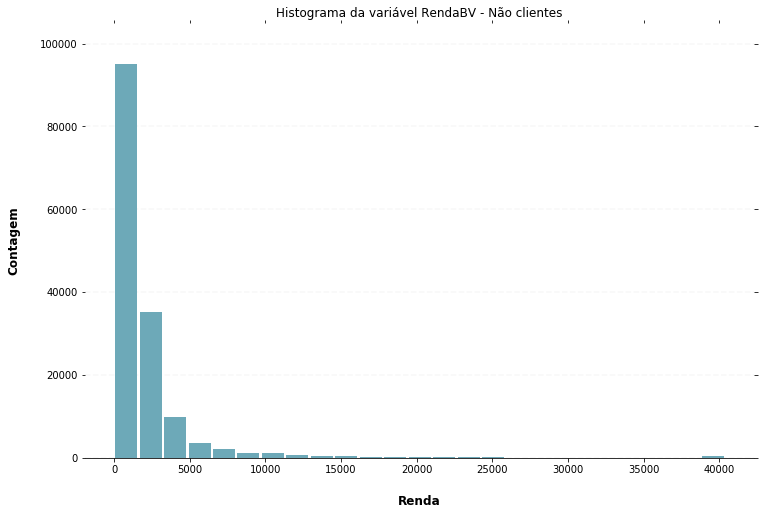

In [0]:
ax = pd_base_fxs_nao_clientes.hist(column='RendaBV', bins=25, grid=False, figsize=(12,8), color='#6DA9B8', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    x.set_title("Histograma da variável RendaBV - Não clientes")
    x.set_xlabel("Renda", labelpad=20, weight='semibold', size=12)
    x.set_ylabel("Contagem",labelpad=20, weight='semibold', size=12)

## Salvando tabela

In [0]:
base_final = base_final_dup

In [0]:
 base_final.write.saveAsTable("cred_felipeoliveira.levesFast_rendaBV_temp",mode='overwrite')

In [0]:
 base_final.write.saveAsTable("cred_felipeoliveira.levesFast_rendaBV",mode='overwrite')